In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
data1 = pd.DataFrame(digits.data)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [8]:
data1.shape

(1797, 64)

In [9]:
digits.target[40]

8

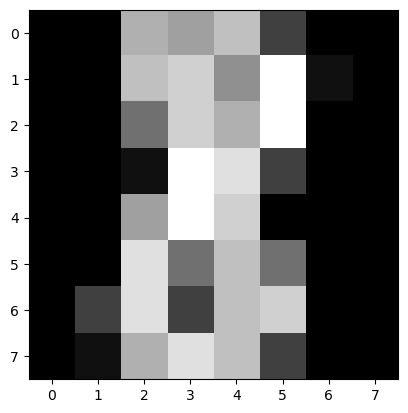

In [10]:
plt.imshow(digits.images[40], cmap=plt.cm.gray)

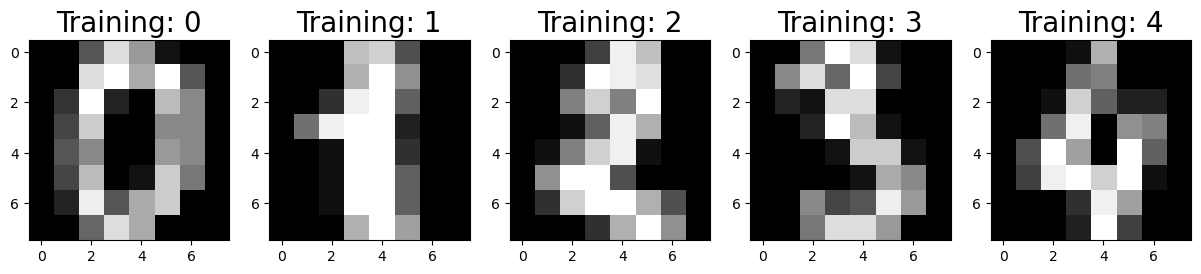

In [11]:
# Displaying some of the images from the data
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20)

In [12]:
x = digits.data #independent data = all 64 features
y = digits.target #dependent data or column = all the labels on the images

In [13]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
x.shape

(1797, 64)

In [16]:
y.shape

(1797,)

In [17]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [18]:
from sklearn.preprocessing import StandardScaler
# data normalisation

x_std = StandardScaler().fit_transform(x)

In [19]:
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [20]:
x_std.shape

(1797, 64)

In [21]:
x1 = x_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [22]:
x1.shape

(64, 1797)

In [23]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)#
eig_vals # this is the new projectiled value for 64 featires

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.27692285, 0.05037444,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [24]:
#calculation of Explained Variance from  the eigen values
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)] # Individual explained variance
var_exp

[12.033916097734886,
 9.561054403097879,
 8.444414892624533,
 6.498407907524167,
 4.860154875966423,
 4.21411986927196,
 3.9420828035674003,
 3.3893809246383326,
 2.998221011625234,
 2.9320025512522006,
 2.781805463550329,
 2.5770550925819964,
 2.2753033157642424,
 2.227179739514349,
 2.165229431849232,
 1.9141666064421308,
 1.7755470851682182,
 1.6380692742844234,
 1.596460168862367,
 1.4891911870878258,
 1.3479695658179258,
 1.271931370234769,
 1.16583735059195,
 1.0576465985363244,
 0.9753159471981114,
 0.9445589897320031,
 0.8630138269707273,
 0.8366428536685199,
 0.7976932484112442,
 0.7464713709260665,
 0.7255821513702747,
 0.6919112454811669,
 0.6539085355726164,
 0.640792573845971,
 0.5913841117223451,
 0.5711624052235275,
 0.5236368034166542,
 0.48180758644514105,
 0.45371925985845585,
 0.4231627532327774,
 0.4060530699790279,
 0.3970848082758248,
 0.35649330314260297,
 0.3407871814702997,
 0.3278353352879524,
 0.31103200734536174,
 0.28857529410893573,
 0.2764892635235465,
 0

In [25]:
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

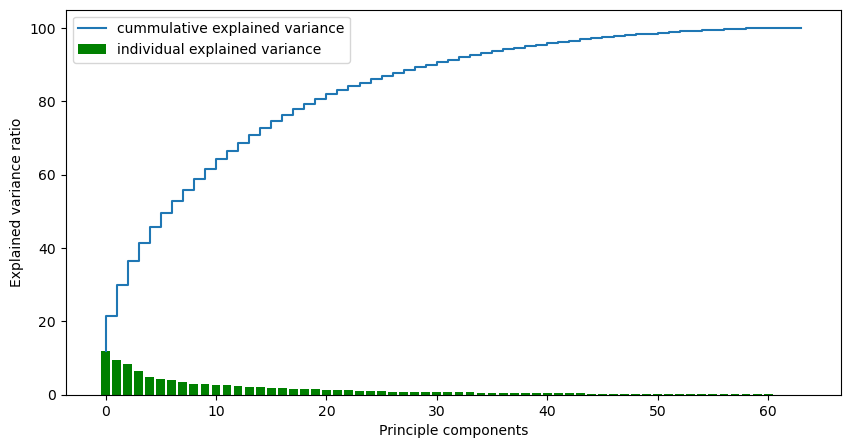

In [26]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, label = "individual explained variance", color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = "cummulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend()
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y,train_size=0.8) 

In [28]:
x_test.shape

(360, 64)

In [29]:
x_train.shape

(1437, 64)

In [30]:
pca = PCA(n_components=20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)#same changes will be get on appliedon x test dataset

In [31]:
rf = DecisionTreeClassifier().fit(pca_x_train, y_train)

In [32]:
predicted = rf.predict(pca_x_test)

In [33]:
predicted

array([3, 5, 2, 8, 8, 2, 8, 5, 8, 0, 6, 6, 3, 3, 9, 9, 9, 2, 5, 1, 0, 4,
       3, 3, 2, 7, 4, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 2, 6, 5, 8, 0, 9, 8,
       9, 9, 1, 5, 8, 2, 8, 4, 5, 2, 5, 6, 7, 8, 0, 4, 7, 2, 5, 3, 7, 7,
       5, 5, 4, 9, 6, 0, 7, 5, 8, 4, 5, 7, 7, 5, 4, 2, 7, 9, 1, 4, 0, 1,
       4, 1, 9, 9, 3, 9, 8, 6, 7, 6, 4, 9, 5, 1, 9, 3, 0, 6, 0, 2, 9, 6,
       3, 0, 0, 4, 6, 2, 0, 7, 2, 5, 7, 9, 8, 5, 3, 7, 4, 5, 6, 3, 0, 5,
       9, 5, 1, 0, 8, 2, 4, 3, 3, 5, 1, 9, 1, 0, 6, 8, 6, 6, 1, 7, 1, 2,
       6, 4, 8, 0, 0, 5, 1, 3, 7, 0, 7, 5, 3, 7, 5, 9, 5, 6, 1, 6, 8, 2,
       5, 1, 3, 0, 6, 0, 3, 5, 1, 8, 8, 2, 5, 4, 8, 8, 9, 1, 4, 3, 2, 9,
       2, 4, 3, 8, 2, 5, 5, 9, 8, 0, 3, 0, 0, 5, 6, 9, 3, 2, 1, 8, 3, 0,
       1, 2, 5, 6, 2, 1, 7, 4, 7, 8, 7, 8, 6, 1, 4, 5, 3, 6, 1, 5, 8, 6,
       4, 2, 1, 9, 9, 5, 9, 3, 0, 3, 7, 2, 0, 4, 1, 1, 6, 2, 4, 4, 5, 1,
       7, 3, 4, 4, 6, 7, 7, 3, 0, 1, 7, 3, 5, 9, 7, 7, 2, 2, 9, 7, 8, 4,
       6, 7, 9, 9, 3, 7, 4, 3, 5, 6, 6, 9, 1, 4, 0,

In [34]:
y_test

array([3, 5, 2, 3, 8, 2, 8, 5, 8, 0, 6, 6, 3, 1, 9, 8, 9, 2, 2, 1, 0, 4,
       6, 3, 2, 7, 4, 3, 1, 2, 2, 1, 1, 0, 5, 1, 0, 2, 6, 5, 8, 0, 9, 1,
       9, 9, 1, 5, 8, 2, 8, 4, 5, 1, 5, 6, 7, 8, 0, 4, 7, 3, 5, 3, 7, 2,
       6, 5, 4, 9, 6, 0, 7, 5, 8, 4, 5, 7, 7, 5, 4, 2, 7, 9, 1, 4, 0, 1,
       1, 9, 9, 9, 3, 7, 8, 6, 7, 6, 4, 9, 6, 1, 5, 8, 0, 6, 0, 2, 9, 6,
       3, 0, 0, 4, 6, 2, 0, 7, 5, 5, 7, 9, 2, 5, 8, 7, 6, 5, 6, 3, 0, 5,
       9, 5, 1, 0, 8, 2, 4, 3, 3, 1, 1, 9, 1, 1, 6, 8, 6, 6, 1, 7, 1, 2,
       6, 4, 8, 0, 0, 2, 1, 8, 7, 0, 7, 3, 3, 7, 5, 9, 5, 6, 1, 6, 3, 2,
       5, 1, 3, 0, 6, 0, 3, 5, 8, 5, 8, 2, 5, 4, 4, 8, 9, 1, 4, 3, 2, 9,
       2, 8, 3, 8, 2, 5, 5, 9, 2, 0, 3, 0, 0, 5, 6, 9, 3, 2, 1, 0, 3, 0,
       6, 7, 5, 6, 2, 1, 7, 4, 7, 8, 7, 8, 2, 1, 4, 5, 3, 6, 1, 5, 5, 6,
       4, 2, 1, 1, 3, 5, 9, 3, 0, 3, 7, 8, 0, 4, 1, 1, 6, 2, 4, 4, 5, 1,
       7, 3, 4, 4, 6, 7, 7, 3, 0, 1, 7, 3, 5, 9, 7, 7, 2, 2, 9, 7, 5, 4,
       6, 7, 9, 4, 3, 7, 4, 3, 5, 6, 6, 9, 1, 4, 0,

In [35]:
accuracy_score(predicted, y_test)

0.8416666666666667

In [36]:
confusion_matrix(predicted, y_test)

array([[37,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  1, 27,  2,  0,  1,  0,  1,  1,  0],
       [ 0,  1,  0, 27,  0,  1,  1,  0,  3,  1],
       [ 0,  4,  0,  0, 33,  0,  1,  0,  1,  0],
       [ 0,  2,  3,  1,  0, 34,  4,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0, 35,  0,  0],
       [ 1,  2,  2,  2,  1,  4,  1,  0, 20,  0],
       [ 0,  1,  0,  2,  1,  2,  0,  1,  1, 27]], dtype=int64)

In [37]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [38]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [39]:
predicted

array([3, 5, 2, 8, 8, 2, 8, 5, 8, 0, 6, 6, 3, 3, 9, 9, 9, 2, 5, 1, 0, 4,
       3, 3, 2, 7, 4, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 2, 6, 5, 8, 0, 9, 8,
       9, 9, 1, 5, 8, 2, 8, 4, 5, 2, 5, 6, 7, 8, 0, 4, 7, 2, 5, 3, 7, 7,
       5, 5, 4, 9, 6, 0, 7, 5, 8, 4, 5, 7, 7, 5, 4, 2, 7, 9, 1, 4, 0, 1,
       4, 1, 9, 9, 3, 9, 8, 6, 7, 6, 4, 9, 5, 1, 9, 3, 0, 6, 0, 2, 9, 6,
       3, 0, 0, 4, 6, 2, 0, 7, 2, 5, 7, 9, 8, 5, 3, 7, 4, 5, 6, 3, 0, 5,
       9, 5, 1, 0, 8, 2, 4, 3, 3, 5, 1, 9, 1, 0, 6, 8, 6, 6, 1, 7, 1, 2,
       6, 4, 8, 0, 0, 5, 1, 3, 7, 0, 7, 5, 3, 7, 5, 9, 5, 6, 1, 6, 8, 2,
       5, 1, 3, 0, 6, 0, 3, 5, 1, 8, 8, 2, 5, 4, 8, 8, 9, 1, 4, 3, 2, 9,
       2, 4, 3, 8, 2, 5, 5, 9, 8, 0, 3, 0, 0, 5, 6, 9, 3, 2, 1, 8, 3, 0,
       1, 2, 5, 6, 2, 1, 7, 4, 7, 8, 7, 8, 6, 1, 4, 5, 3, 6, 1, 5, 8, 6,
       4, 2, 1, 9, 9, 5, 9, 3, 0, 3, 7, 2, 0, 4, 1, 1, 6, 2, 4, 4, 5, 1,
       7, 3, 4, 4, 6, 7, 7, 3, 0, 1, 7, 3, 5, 9, 7, 7, 2, 2, 9, 7, 8, 4,
       6, 7, 9, 9, 3, 7, 4, 3, 5, 6, 6, 9, 1, 4, 0,

In [40]:
def get_misclassified_index(y_pred, y_test):
    misclassification = []#helps us out to get the miclassified data
    for index,(predicted, actual) in enumerate(zip(y_pred, y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [41]:
misclassification = get_misclassified_index(predicted,y_test)

In [42]:
misclassification

[3,
 13,
 15,
 18,
 22,
 27,
 34,
 43,
 53,
 61,
 65,
 66,
 88,
 89,
 93,
 100,
 102,
 103,
 118,
 122,
 124,
 126,
 141,
 145,
 159,
 161,
 165,
 174,
 184,
 185,
 190,
 199,
 206,
 217,
 220,
 221,
 232,
 240,
 245,
 246,
 253,
 284,
 289,
 303,
 307,
 310,
 313,
 320,
 322,
 328,
 342,
 344,
 346,
 352,
 353,
 358,
 359]

In [46]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong], (5,4)), cmap=plt.cm.gray)
        plt.title("predicted:{} Actual:{}".format(predicted[wrong], y_test[wrong]))

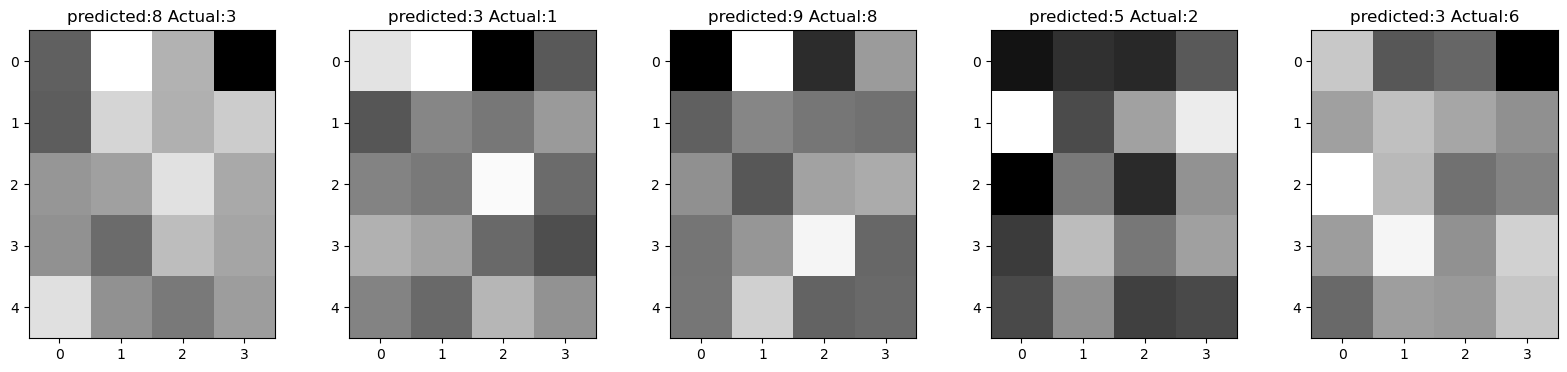

In [47]:
plot_misclassifications(misclassification)